In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
from keras import Input
from keras.models import Sequential
from keras.layers import  Dense, Dropout, Conv2D, Flatten, GlobalMaxPooling2D, MaxPooling2D, Input, BatchNormalization, AveragePooling2D, Activation
import json
import pandas as pd
import gc
from scipy import sparse
from IPython.display import clear_output

In [2]:
import matplotlib.pyplot as plt

# RCV1

## Model

In [2]:
y_test =np.load('./ModelData/y_test-RCV1.npy')
y_train =np.load('./ModelData/y_train-RCV1.npy')
x_train = sparse.load_npz('./ModelData/x_train-RCV1.npz')
x_test = sparse.load_npz('./ModelData/x_test-RCV1.npz')

In [3]:
y_train = y_train.astype(int)
y_test = y_test.astype(int)

In [4]:
x_train.data = np.subtract(x_train.data,0.07)
x_test.data = np.subtract(x_test.data,0.07)

In [5]:
y_test.shape

(781265, 103)

In [6]:
y_train.shape

(23149, 103)

In [8]:
def impurity(l):
    count = 0
    y_count = np.zeros((103,))
    for i in range(l.shape[0]):
        for j in range(l.shape[1]):
            if l[i,j] == 1:
                count += 1
                y_count[j] += 1
    imp = 0
    zero_count = 0
    for i in y_count:
        if i > 0:
            imp += (i/count)*(np.log2(i/count))
        else:
            zero_count += 1
    return imp, zero_count

In [9]:
results= []
gap = 20000
for i in range(0,761001,gap):
    print(i)
    imp, zc = impurity(y_test[i:i+gap+1])
    results.append([zc,imp,i,i+gap])
results.sort()

0
20000
40000
60000
80000
100000
120000
140000
160000
180000
200000
220000
240000
260000
280000
300000
320000
340000
360000
380000
400000
420000
440000
460000
480000
500000
520000
540000
560000
580000
600000
620000
640000
660000
680000
700000
720000
740000
760000


In [11]:
x_test = x_test[int(results[0][2]):int(results[0][2])+1]
y_test = y_test[int(results[0][2]):int(results[0][2])+1]

In [12]:
x_train = x_train.tocoo()
indices = np.mat([x_train.row, x_train.col]).transpose()
x_train = tf.SparseTensor(indices, x_train.data, x_train.shape)

x_test = x_test.tocoo()
indices = np.mat([x_test.row, x_test.col]).transpose()
x_test = tf.SparseTensor(indices, x_test.data, x_test.shape)

In [ ]:
model = Sequential()

model.add(Input(shape=(47236,), sparse=True))

model.add(Dense(1000, activation='relu'))
model.add(Dense(2000, activation='relu'))
model.add(Dense(2000, activation='relu'))
model.add(Dense(1000, activation='relu'))

model.add(Dense(103, activation='relu',))


model.summary()
opt = tf.keras.optimizers.Adam(learning_rate=1e-7)
model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['acc','mae','mse'])

score = model.fit(x_train, y_train, epochs=30, batch_size=100 ,validation_data=(x_test, y_test))

In [ ]:
json.dump(score.history, open("ExperimentD0-RCV1", 'w'))

In [ ]:
del(model)
del(score)
gc.collect()

In [ ]:
count = 1
for i in [0.2,0.4,0.6,0.8]:

    model = Sequential()

    model.add(Input(shape=(47236,), sparse=True))

    model.add(Dense(1000, activation='relu'))
    model.add(Dropout(i))
    model.add(Dense(2000, activation='relu'))
    model.add(Dropout(i))
    model.add(Dense(2000, activation='relu'))
    model.add(Dropout(i))
    model.add(Dense(1000, activation='relu'))
    model.add(Dropout(i))

    model.add(Dense(103, activation='relu',))


    model.summary()
    opt = tf.keras.optimizers.Adam(learning_rate=1e-7)
    model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['acc','mae','mse'])

    score = model.fit(x_train, y_train, epochs=30, batch_size=100 ,validation_data=(x_test, y_test),verbose=2)
    
    json.dump(score.history, open("./Results/ExperimentD"+str(int(i*10))+'-RCV1', 'w'))
    
    del(model)
    del(score)
    gc.collect()
    clear_output(wait=True)
    print(count)
    count += 1
print("FINISHED")

In [28]:
del(x_train)
del(x_test)
del(y_train)
del(y_test)
gc.collect()

1080

## Visualization

In [13]:
score0 = json.load(open('./Results/ExperimentD0-RCV1', 'r'))
score2 = json.load(open('./Results/ExperimentD2-RCV1', 'r'))
score4 = json.load(open('./Results/ExperimentD4-RCV1', 'r'))
score6 = json.load(open('./Results/ExperimentD6-RCV1', 'r'))
score8 = json.load(open('./Results/ExperimentD8-RCV1', 'r'))

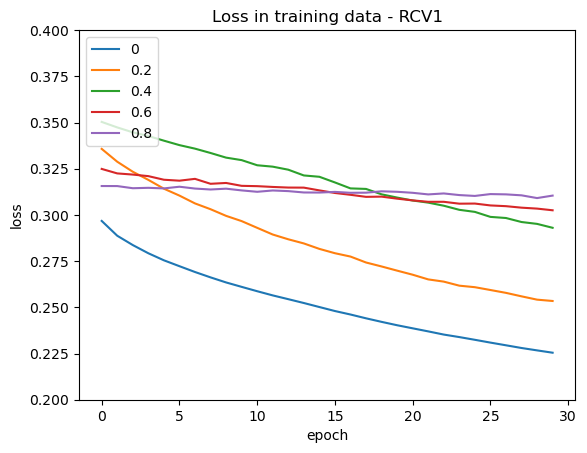

In [18]:
plt.figure(1)
plt.plot(score0['loss'])
plt.plot(score2['loss'])
plt.plot(score4['loss'])
plt.plot(score6['loss'])
plt.plot(score8['loss'])
plt.title('Loss in training data - RCV1')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['0','0.2','0.4','0.6','0.8'], loc='upper left')
plt.ylim([0.2,0.4])
plt.show()

In [19]:
loss_gradient0 = []
loss_gradient2 = []
loss_gradient4 = []
loss_gradient6 = []
loss_gradient8 = []
for i in range(29):
    loss_gradient0.append(score0['loss'][i+1]-score0['loss'][i])
    loss_gradient2.append(score2['loss'][i+1]-score2['loss'][i])
    loss_gradient4.append(score4['loss'][i+1]-score4['loss'][i])
    loss_gradient6.append(score6['loss'][i+1]-score6['loss'][i])
    loss_gradient8.append(score8['loss'][i+1]-score8['loss'][i])
loss_gradient0 = np.array(loss_gradient0)
loss_gradient2 = np.array(loss_gradient2)
loss_gradient4 = np.array(loss_gradient4)
loss_gradient6 = np.array(loss_gradient6)
loss_gradient8 = np.array(loss_gradient8)

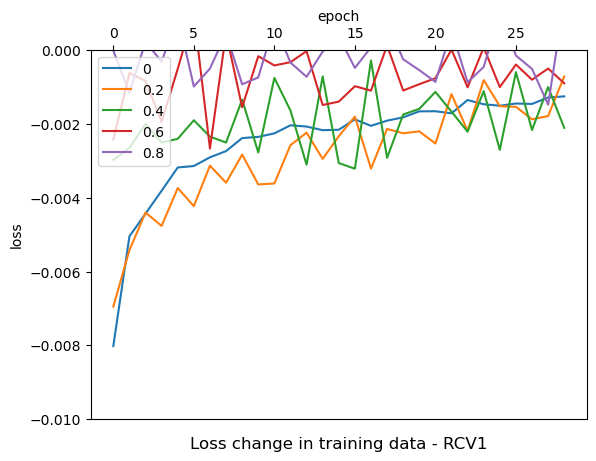

In [20]:
fig, ax = plt.subplots()
ax.xaxis.tick_top()
plt.plot(loss_gradient0)
plt.plot(loss_gradient2)
plt.plot(loss_gradient4)
plt.plot(loss_gradient6)
plt.plot(loss_gradient8)
plt.title('Loss change in training data - RCV1',y=-0.1)
plt.ylabel('loss')
ax.set_xlabel('epoch')    
ax.xaxis.set_label_position('top')
plt.legend(['0','0.2','0.4','0.6','0.8'], loc='upper left')
plt.ylim([-0.01,0.0])
plt.show()

In [21]:
print(np.mean(loss_gradient0[5:]))
print(np.mean(loss_gradient2[5:]))
print(np.mean(loss_gradient4[5:]))
print(np.mean(loss_gradient6[5:]))
print(np.mean(loss_gradient8[5:]))

-0.0019507799297571182
-0.002376002569993337
-0.0018638682862122853
-0.0006672888994216919
-0.00020008410016695657


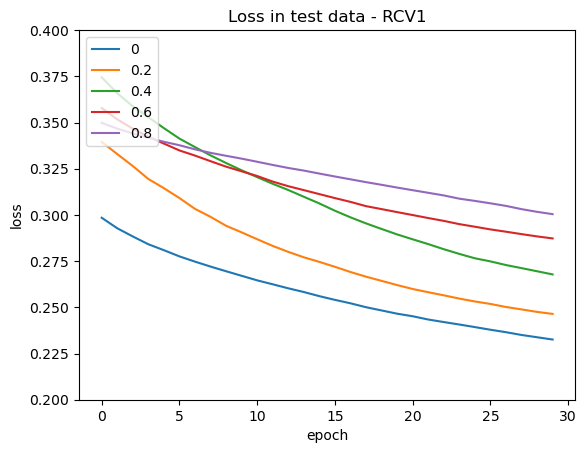

In [22]:
plt.figure(1)
plt.plot(score0['val_loss'])
plt.plot(score2['val_loss'])
plt.plot(score4['val_loss'])
plt.plot(score6['val_loss'])
plt.plot(score8['val_loss'])
plt.title('Loss in test data - RCV1')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['0','0.2','0.4','0.6','0.8'], loc='upper left')
plt.ylim([0.2,0.4])
plt.show()

In [23]:
loss_gradient0 = []
loss_gradient2 = []
loss_gradient4 = []
loss_gradient6 = []
loss_gradient8 = []
for i in range(29):
    loss_gradient0.append(score0['val_loss'][i+1]-score0['val_loss'][i])
    loss_gradient2.append(score2['val_loss'][i+1]-score2['val_loss'][i])
    loss_gradient4.append(score4['val_loss'][i+1]-score4['val_loss'][i])
    loss_gradient6.append(score6['val_loss'][i+1]-score6['val_loss'][i])
    loss_gradient8.append(score8['val_loss'][i+1]-score8['val_loss'][i])
loss_gradient0 = np.array(loss_gradient0)
loss_gradient2 = np.array(loss_gradient2)
loss_gradient4 = np.array(loss_gradient4)
loss_gradient6 = np.array(loss_gradient6)
loss_gradient8 = np.array(loss_gradient8)

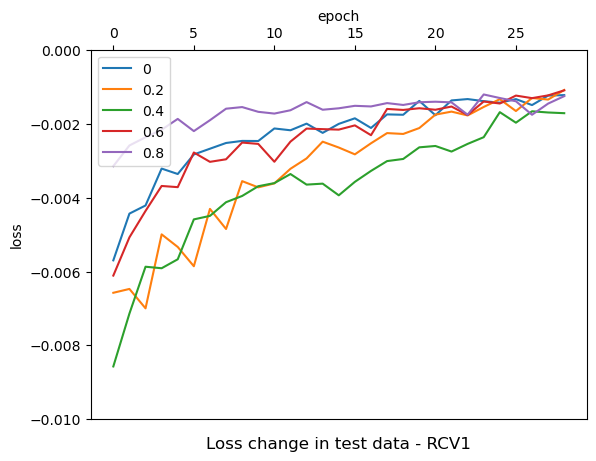

In [24]:
fig, ax = plt.subplots()
ax.xaxis.tick_top()
plt.plot(loss_gradient0)
plt.plot(loss_gradient2)
plt.plot(loss_gradient4)
plt.plot(loss_gradient6)
plt.plot(loss_gradient8)
plt.title('Loss change in test data - RCV1',y=-0.1)
plt.ylabel('loss')
ax.set_xlabel('epoch')    
ax.xaxis.set_label_position('top') 
plt.legend(['0','0.2','0.4','0.6','0.8'], loc='upper left')
plt.ylim([-0.01,0.0])
plt.show()

In [25]:
print(np.mean(loss_gradient0[5:]))
print(np.mean(loss_gradient2[5:]))
print(np.mean(loss_gradient4[5:]))
print(np.mean(loss_gradient6[5:]))
print(np.mean(loss_gradient8[5:]))

-0.00187415877978007
-0.0026121363043785095
-0.0030623264610767365
-0.0019837493697802224
-0.0015533578892548878


In [26]:
del(score0)
del(loss_gradient0)
del(score2)
del(loss_gradient2)
del(score4)
del(loss_gradient4)
del(score6)
del(loss_gradient6)
del(score8)
del(loss_gradient8)
gc.collect()

11565

# MNIST

## Model

In [34]:
x_train = np.loadtxt('./ModelData/x_train-MNIST')
y_train = np.loadtxt('./ModelData/y_train-MNIST')
x_test = np.loadtxt('./ModelData/x_test-MNIST')
y_test = np.loadtxt('./ModelData/y_test-MNIST')

In [35]:
df = pd.DataFrame(columns=['dropout','loss', 'acc', 'mae', 'mse', 'val_loss', 'val_acc', 'val_mae', 'val_mse'],dtype='float64')
df2 = pd.DataFrame(columns=['dropout','loss', 'acc', 'mae', 'mse', 'val_loss', 'val_acc', 'val_mae', 'val_mse'],dtype='float64')

In [ ]:
model = Sequential()


model.add(Dense(1024, activation='sigmoid', input_shape = (784,)))
model.add(Dense(1024, activation='sigmoid',))
model.add(Dense(1024, activation='sigmoid',))

model.add(Dense(10, activation='sigmoid',))


model.summary()
opt = tf.keras.optimizers.Adam(learning_rate=5e-5)
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['acc','mae','mse'])

score = model.fit(x_train, y_train, epochs=100, batch_size=80 ,validation_data=(x_test, y_test))

In [ ]:
newRow = [0.0]
newRow.append(score.history['loss'][99])
newRow.append(score.history['acc'][99])
newRow.append(score.history['mae'][99])
newRow.append(score.history['mse'][99])
newRow.append(score.history['val_loss'][99])
newRow.append(score.history['val_acc'][99])
newRow.append(score.history['val_mae'][99])
newRow.append(score.history['val_mse'][99])

newDF = pd.DataFrame([newRow],columns=['dropout','loss', 'acc', 'mae', 'mse', 'val_loss', 'val_acc', 'val_mae', 'val_mse']) 
df = pd.concat([df,newDF])

del(newRow)
del(newDF)
gc.collect()

newRow = [0.0]
newRow.append(score.history['loss'][-1])
newRow.append(score.history['acc'][-1])
newRow.append(score.history['mae'][-1])
newRow.append(score.history['mse'][-1])
newRow.append(score.history['val_loss'][-1])
newRow.append(score.history['val_acc'][-1])
newRow.append(score.history['val_mae'][-1])
newRow.append(score.history['val_mse'][-1])

newDF = pd.DataFrame([newRow],columns=['dropout','loss', 'acc', 'mae', 'mse', 'val_loss', 'val_acc', 'val_mae', 'val_mse']) 
df2 = pd.concat([df2,newDF])

del(model)
del(score)
del(newRow)
del(newDF)
gc.collect()

In [ ]:
count = 1
for i in [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]:
                
                model = Sequential()

                model.add(Dense(1024, activation='sigmoid', input_shape = (784,)))
                
                model.add(Dropout(i))
                model.add(Dense(1024, activation='sigmoid',))
                
                model.add(Dropout(i))
                model.add(Dense(1024, activation='sigmoid',))
                
                model.add(Dropout(i))
                model.add(Dense(10, activation='sigmoid',))
                
                opt = tf.keras.optimizers.Adam(learning_rate=5e-5)
                model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['acc','mae','mse'])

                score = model.fit(x_train, y_train, epochs=100+int(100*i), batch_size=80 ,validation_data=(x_test, y_test),verbose=0)
                
                newRow = [i]
                newRow.append(score.history['loss'][99])
                newRow.append(score.history['acc'][99])
                newRow.append(score.history['mae'][99])
                newRow.append(score.history['mse'][99])
                newRow.append(score.history['val_loss'][99])
                newRow.append(score.history['val_acc'][99])
                newRow.append(score.history['val_mae'][99])
                newRow.append(score.history['val_mse'][99])

                newDF = pd.DataFrame([newRow],columns=['dropout','loss', 'acc', 'mae', 'mse', 'val_loss', 'val_acc', 'val_mae', 'val_mse']) 
                df = pd.concat([df,newDF])

                del(newRow)
                del(newDF)
                gc.collect()

                newRow = [i]
                newRow.append(score.history['loss'][-1])
                newRow.append(score.history['acc'][-1])
                newRow.append(score.history['mae'][-1])
                newRow.append(score.history['mse'][-1])
                newRow.append(score.history['val_loss'][-1])
                newRow.append(score.history['val_acc'][-1])
                newRow.append(score.history['val_mae'][-1])
                newRow.append(score.history['val_mse'][-1])

                newDF = pd.DataFrame([newRow],columns=['dropout','loss', 'acc', 'mae', 'mse', 'val_loss', 'val_acc', 'val_mae', 'val_mse']) 
                df2 = pd.concat([df2,newDF])

                del(model)
                del(score)
                del(newRow)
                del(newDF)
                gc.collect()
                
                print(count)
                count += 1
print("FINISHED")

In [ ]:
df.to_csv('./Results/Results0-MNIST.csv', index=False)
df2.to_csv('./Results/Results1-MNIST.csv', index=False)

In [36]:
del(x_train)
del(x_test)
del(y_train)
del(y_test)
del(df)
del(df2)
gc.collect()

57

## Visualization

In [39]:
df = pd.read_csv('./Results/Results0-MNIST.csv')

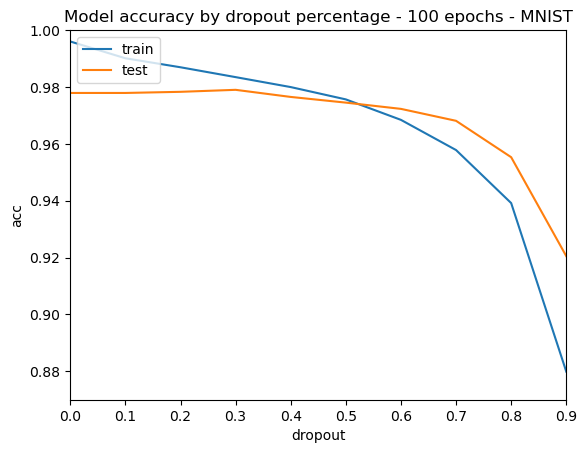

In [40]:
plt.figure(1)
plt.plot(df['dropout'],df['acc'])
plt.plot(df['dropout'],df['val_acc'])
plt.title('Model accuracy by dropout percentage - 100 epochs - MNIST')
plt.ylabel('acc')
plt.xlabel('dropout')
plt.legend(['train', 'test'], loc='upper left')
plt.xlim([0.0,0.9])
plt.ylim([0.87,1.0])
plt.show()

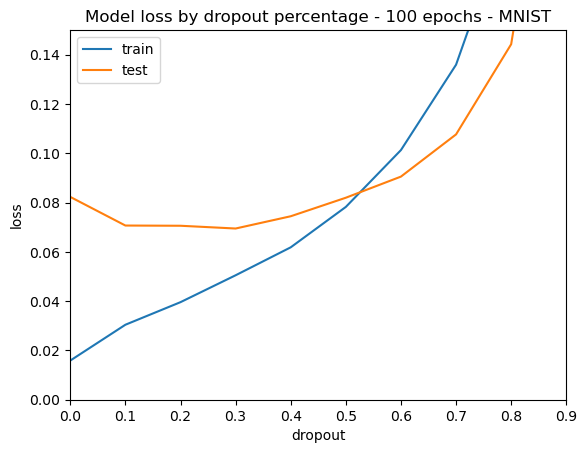

In [41]:
plt.figure(2)
plt.plot(df['dropout'],df['loss'])
plt.plot(df['dropout'],df['val_loss'])
plt.title('Model loss by dropout percentage - 100 epochs - MNIST')
plt.ylabel('loss')
plt.xlabel('dropout')
plt.legend(['train', 'test'], loc='upper left')
plt.xlim([0.0,0.9])
plt.ylim([0.0,0.15])
plt.show()

In [42]:
del(df)
gc.collect()

7724

In [43]:
df2 = pd.read_csv('./Results/Results1-MNIST.csv')

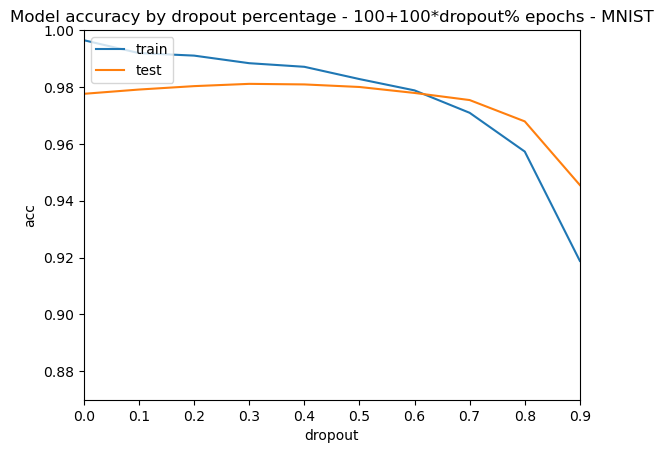

In [44]:
plt.figure(3)
plt.plot(df2['dropout'],df2['acc'])
plt.plot(df2['dropout'],df2['val_acc'])
plt.title('Model accuracy by dropout percentage - 100+100*dropout% epochs - MNIST')
plt.ylabel('acc')
plt.xlabel('dropout')
plt.legend(['train', 'test'], loc='upper left')
plt.xlim([0.0,0.9])
plt.ylim([0.87,1.0])
plt.show()

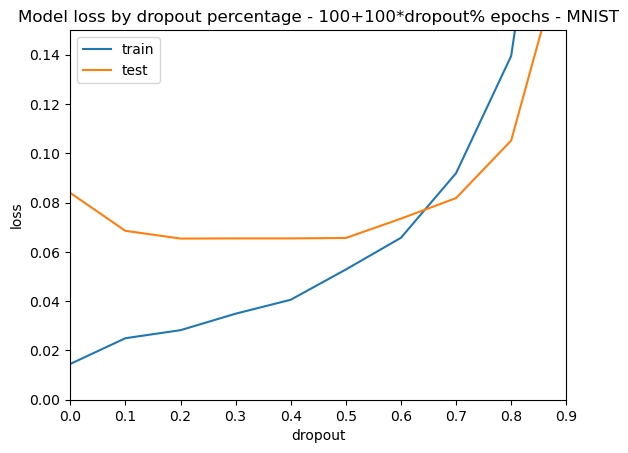

In [46]:
plt.figure(4)
plt.plot(df2['dropout'],df2['loss'])
plt.plot(df2['dropout'],df2['val_loss'])
plt.title('Model loss by dropout percentage - 100+100*dropout% epochs - MNIST')
plt.ylabel('loss')
plt.xlabel('dropout')
plt.legend(['train', 'test'], loc='upper left')
plt.xlim([0.0,0.9])
plt.ylim([0.0,0.15])
plt.show()

In [47]:
del(df2)
gc.collect()

7193

# CIFAR 10

## Model

In [49]:
x_train = np.load('./ModelData/x_train-CIFAR.npy')
y_train = np.load('./ModelData/y_train-CIFAR.npy')
x_test = np.load('./ModelData/x_test-CIFAR.npy')
y_test = np.load('./ModelData/y_test-CIFAR.npy')

In [51]:
feature_shape = x_train[0].shape

In [52]:
df = pd.DataFrame(columns=['dropout','loss', 'acc', 'mae', 'mse', 'val_loss', 'val_acc', 'val_mae', 'val_mse'],dtype='float64')
df2 = pd.DataFrame(columns=['dropout','loss', 'acc', 'mae', 'mse', 'val_loss', 'val_acc', 'val_mae', 'val_mse'],dtype='float64')

In [ ]:
model = Sequential()


model.add(Conv2D(32, (3, 3), activation='relu', padding='same',input_shape=feature_shape))
model.add(BatchNormalization())
model.add(Conv2D(32, (3, 3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.4))

model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.4))
 
model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.4))
 
model.add(Flatten())
 
model.add(Dense(1024, activation='relu'))
model.add(Dropout(0.4))

 
model.add(Dense(10, activation='softmax'))


model.summary()
opt = tf.keras.optimizers.Adam()
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['acc','mae','mse'])

score = model.fit(x_train, y_train, epochs=30, batch_size=500 ,validation_data=(x_test, y_test))

In [ ]:
newRow = [0.0]
newRow.append(score.history['loss'][29])
newRow.append(score.history['acc'][29])
newRow.append(score.history['mae'][29])
newRow.append(score.history['mse'][29])
newRow.append(score.history['val_loss'][29])
newRow.append(score.history['val_acc'][29])
newRow.append(score.history['val_mae'][29])
newRow.append(score.history['val_mse'][29])

newDF = pd.DataFrame([newRow],columns=['dropout','loss', 'acc', 'mae', 'mse', 'val_loss', 'val_acc', 'val_mae', 'val_mse']) 
df = pd.concat([df,newDF])

del(newRow)
del(newDF)
gc.collect()

newRow = [0.0]
newRow.append(score.history['loss'][-1])
newRow.append(score.history['acc'][-1])
newRow.append(score.history['mae'][-1])
newRow.append(score.history['mse'][-1])
newRow.append(score.history['val_loss'][-1])
newRow.append(score.history['val_acc'][-1])
newRow.append(score.history['val_mae'][-1])
newRow.append(score.history['val_mse'][-1])

newDF = pd.DataFrame([newRow],columns=['dropout','loss', 'acc', 'mae', 'mse', 'val_loss', 'val_acc', 'val_mae', 'val_mse']) 
df2 = pd.concat([df2,newDF])

del(model)
del(score)
del(newRow)
del(newDF)
gc.collect()

In [ ]:
count = 1
for i in [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]:

    model = Sequential()


    model.add(Conv2D(32, (3, 3), activation='relu', padding='same',input_shape=feature_shape))
    model.add(BatchNormalization())
    model.add(Conv2D(32, (3, 3), activation='relu', padding='same'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D((2, 2)))
    model.add(Dropout(i))

    model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
    model.add(BatchNormalization())
    model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D((2, 2)))
    model.add(Dropout(i))

    model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
    model.add(BatchNormalization())
    model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D((2, 2)))
    model.add(Dropout(i))

    model.add(Flatten())

    model.add(Dense(1024, activation='relu'))
    model.add(Dropout(i))


    model.add(Dense(10, activation='softmax'))
    
    opt = tf.keras.optimizers.Adam()
    model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['acc','mae','mse'])
    score = model.fit(x_train, y_train, epochs=30+int(30*i), batch_size=500 ,validation_data=(x_test, y_test),verbose=2)
    
    newRow = [i]
    newRow.append(score.history['loss'][29])
    newRow.append(score.history['acc'][29])
    newRow.append(score.history['mae'][29])
    newRow.append(score.history['mse'][29])
    newRow.append(score.history['val_loss'][29])
    newRow.append(score.history['val_acc'][29])
    newRow.append(score.history['val_mae'][29])
    newRow.append(score.history['val_mse'][29])
    
    newDF = pd.DataFrame([newRow],columns=['dropout','loss', 'acc', 'mae', 'mse', 'val_loss', 'val_acc', 'val_mae', 'val_mse']) 
    df = pd.concat([df,newDF])
    
    del(newRow)
    del(newDF)
    gc.collect()
    
    newRow = [i]
    newRow.append(score.history['loss'][-1])
    newRow.append(score.history['acc'][-1])
    newRow.append(score.history['mae'][-1])
    newRow.append(score.history['mse'][-1])
    newRow.append(score.history['val_loss'][-1])
    newRow.append(score.history['val_acc'][-1])
    newRow.append(score.history['val_mae'][-1])
    newRow.append(score.history['val_mse'][-1])
    
    newDF = pd.DataFrame([newRow],columns=['dropout','loss', 'acc', 'mae', 'mse', 'val_loss', 'val_acc', 'val_mae', 'val_mse']) 
    df2 = pd.concat([df2,newDF])
    
    del(model)
    del(score)
    del(newRow)
    del(newDF)
    gc.collect()
    clear_output(wait=True)
    print(count)
    count += 1
print("FINISHED")

In [ ]:
df.to_csv('./Results/Results0-CIFAR.csv', index=False)
df2.to_csv('./Results/Results1-CIFAR.csv', index=False)

In [53]:
del(x_train)
del(x_test)
del(y_train)
del(y_test)
del(df)
del(df2)
gc.collect()

463

## Visualization

In [54]:
df = pd.read_csv('./Results/Results0-CIFAR.csv')

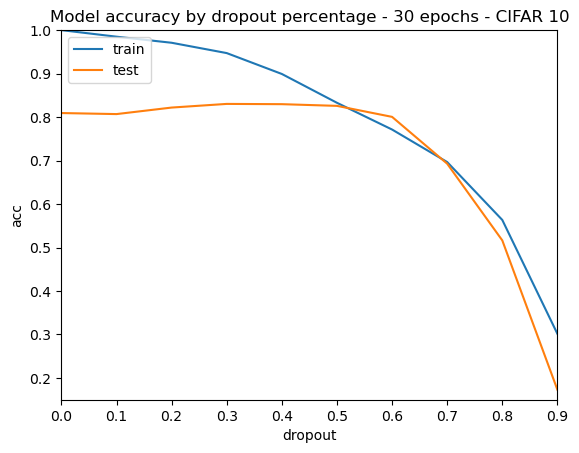

In [55]:
plt.figure(1)
plt.plot(df['dropout'],df['acc'])
plt.plot(df['dropout'],df['val_acc'])
plt.title('Model accuracy by dropout percentage - 30 epochs - CIFAR 10')
plt.ylabel('acc')
plt.xlabel('dropout')
plt.legend(['train', 'test'], loc='upper left')
plt.xlim([0.0,0.9])
plt.ylim([0.15,1.0])
plt.show()

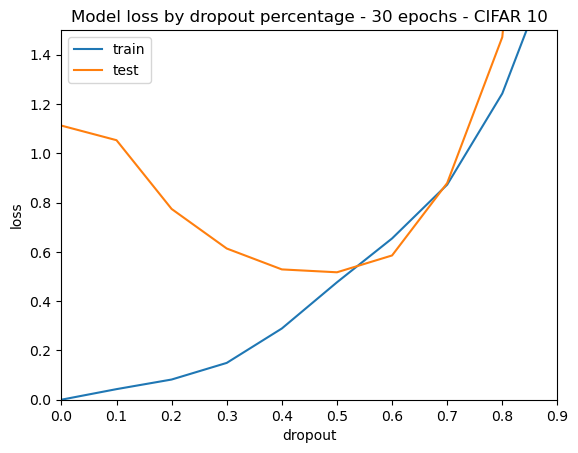

In [56]:
plt.figure(2)
plt.plot(df['dropout'],df['loss'])
plt.plot(df['dropout'],df['val_loss'])
plt.title('Model loss by dropout percentage - 30 epochs - CIFAR 10')
plt.ylabel('loss')
plt.xlabel('dropout')
plt.legend(['train', 'test'], loc='upper left')
plt.xlim([0.0,0.9])
plt.ylim([0.0,1.5])
plt.show()

In [57]:
del(df)
gc.collect()

7177

In [58]:
df2 = pd.read_csv('./Results/Results1-CIFAR.csv')

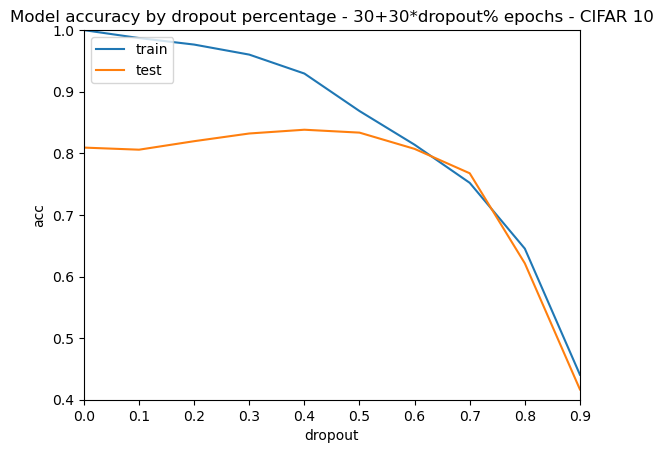

In [59]:
plt.figure(3)
plt.plot(df2['dropout'],df2['acc'])
plt.plot(df2['dropout'],df2['val_acc'])
plt.title('Model accuracy by dropout percentage - 30+30*dropout% epochs - CIFAR 10')
plt.ylabel('acc')
plt.xlabel('dropout')
plt.legend(['train', 'test'], loc='upper left')
plt.xlim([0.0,0.9])
plt.ylim([0.4,1.0])
plt.show()

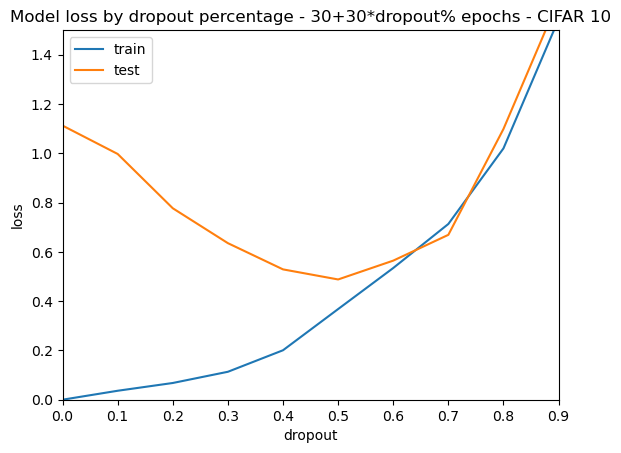

In [61]:
plt.figure(4)
plt.plot(df2['dropout'],df2['loss'])
plt.plot(df2['dropout'],df2['val_loss'])
plt.title('Model loss by dropout percentage - 30+30*dropout% epochs - CIFAR 10')
plt.ylabel('loss')
plt.xlabel('dropout')
plt.legend(['train', 'test'], loc='upper left')
plt.xlim([0.0,0.9])
plt.ylim([0.0,1.5])
plt.show()

In [62]:
del(df2)
gc.collect()

7091

# SVHN

## Model

In [63]:
x_train = np.load('./ModelData/x_train-SVHN.npy')
y_train = np.load('./ModelData/y_train-SVHN.npy')
x_test = np.load('./ModelData/x_test-SVHN.npy')
y_test = np.load('./ModelData/y_test-SVHN.npy')

In [64]:
feature_shape = x_train[0].shape

In [65]:
df = pd.DataFrame(columns=['dropout','loss', 'acc', 'mae', 'mse', 'val_loss', 'val_acc', 'val_mae', 'val_mse'],dtype='float64')
df2 = pd.DataFrame(columns=['dropout','loss', 'acc', 'mae', 'mse', 'val_loss', 'val_acc', 'val_mae', 'val_mse'],dtype='float64')

In [ ]:
model = Sequential()


model.add(Conv2D(32, (3, 3), activation='relu', padding='same',input_shape=feature_shape))
model.add(BatchNormalization())
model.add(Conv2D(32, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D((2, 2)))

model.add(Flatten())
 
model.add(Dense(256, activation='relu'))
model.add(Dense(256, activation='relu'))

 
model.add(Dense(10, activation='softmax'))


model.summary()
opt = tf.keras.optimizers.Adam(learning_rate=1e-5)
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['acc','mae','mse'])

score = model.fit(x_train, y_train, epochs=30, batch_size=100 ,validation_data=(x_test, y_test), verbose=2)

In [ ]:
newRow = [0.0]
newRow.append(score.history['loss'][29])
newRow.append(score.history['acc'][29])
newRow.append(score.history['mae'][29])
newRow.append(score.history['mse'][29])
newRow.append(score.history['val_loss'][29])
newRow.append(score.history['val_acc'][29])
newRow.append(score.history['val_mae'][29])
newRow.append(score.history['val_mse'][29])

newDF = pd.DataFrame([newRow],columns=['dropout','loss', 'acc', 'mae', 'mse', 'val_loss', 'val_acc', 'val_mae', 'val_mse']) 
df = pd.concat([df,newDF])

del(newRow)
del(newDF)
gc.collect()

newRow = [0.0]
newRow.append(score.history['loss'][-1])
newRow.append(score.history['acc'][-1])
newRow.append(score.history['mae'][-1])
newRow.append(score.history['mse'][-1])
newRow.append(score.history['val_loss'][-1])
newRow.append(score.history['val_acc'][-1])
newRow.append(score.history['val_mae'][-1])
newRow.append(score.history['val_mse'][-1])

newDF = pd.DataFrame([newRow],columns=['dropout','loss', 'acc', 'mae', 'mse', 'val_loss', 'val_acc', 'val_mae', 'val_mse']) 
df2 = pd.concat([df2,newDF])

del(model)
del(score)
del(newRow)
del(newDF)
gc.collect()

In [ ]:
count = 1
for i in [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]:

    model = Sequential()


    model.add(Conv2D(32, (3, 3), activation='relu', padding='same',input_shape=feature_shape))
    model.add(BatchNormalization())
    model.add(Conv2D(32, (3, 3), activation='relu', padding='same'))
    model.add(MaxPooling2D((2, 2)))

    model.add(Flatten())

    model.add(Dense(256, activation='relu'))
    model.add(Dropout(i))
    model.add(Dense(256, activation='relu'))
    model.add(Dropout(i))


    model.add(Dense(10, activation='softmax'))

    opt = tf.keras.optimizers.Adam(learning_rate=1e-5)
    model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['acc','mae','mse'])

    score = model.fit(x_train, y_train, epochs=30+int(30*i), batch_size=100 ,validation_data=(x_test, y_test), verbose=2)
    
    newRow = [i]
    newRow.append(score.history['loss'][29])
    newRow.append(score.history['acc'][29])
    newRow.append(score.history['mae'][29])
    newRow.append(score.history['mse'][29])
    newRow.append(score.history['val_loss'][29])
    newRow.append(score.history['val_acc'][29])
    newRow.append(score.history['val_mae'][29])
    newRow.append(score.history['val_mse'][29])
    
    newDF = pd.DataFrame([newRow],columns=['dropout','loss', 'acc', 'mae', 'mse', 'val_loss', 'val_acc', 'val_mae', 'val_mse']) 
    df = pd.concat([df,newDF])
    
    del(newRow)
    del(newDF)
    gc.collect()
    
    newRow = [i]
    newRow.append(score.history['loss'][-1])
    newRow.append(score.history['acc'][-1])
    newRow.append(score.history['mae'][-1])
    newRow.append(score.history['mse'][-1])
    newRow.append(score.history['val_loss'][-1])
    newRow.append(score.history['val_acc'][-1])
    newRow.append(score.history['val_mae'][-1])
    newRow.append(score.history['val_mse'][-1])
    
    newDF = pd.DataFrame([newRow],columns=['dropout','loss', 'acc', 'mae', 'mse', 'val_loss', 'val_acc', 'val_mae', 'val_mse']) 
    df2 = pd.concat([df2,newDF])
    
    del(model)
    del(score)
    del(newRow)
    del(newDF)
    gc.collect()
    clear_output(wait=True)
    print(count)
    count += 1
print("FINISHED")

In [ ]:
df.to_csv('./Results/Results0-SVHN.csv', index=False)
df2.to_csv('./Results/Results1-SVHN.csv', index=False)

In [66]:
del(x_train)
del(x_test)
del(y_train)
del(y_test)
del(df)
del(df2)
gc.collect()

44

## Visualization

In [68]:
df = pd.read_csv('./Results/Results0-SVHN.csv')

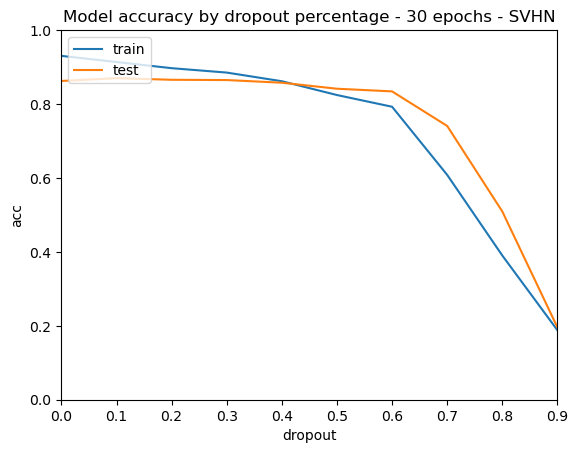

In [69]:
plt.figure(1)
plt.plot(df['dropout'],df['acc'])
plt.plot(df['dropout'],df['val_acc'])
plt.title('Model accuracy by dropout percentage - 30 epochs - SVHN')
plt.ylabel('acc')
plt.xlabel('dropout')
plt.legend(['train', 'test'], loc='upper left')
plt.xlim([0.0,0.9])
plt.ylim([0.0,1.0])
plt.show()

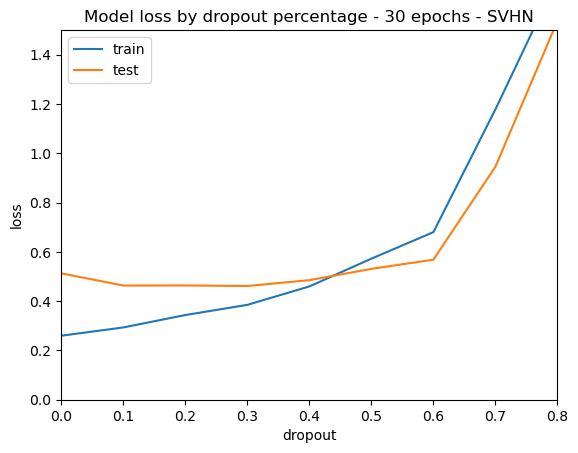

In [71]:
plt.figure(2)
plt.plot(df['dropout'],df['loss'])
plt.plot(df['dropout'],df['val_loss'])
plt.title('Model loss by dropout percentage - 30 epochs - SVHN')
plt.ylabel('loss')
plt.xlabel('dropout')
plt.legend(['train', 'test'], loc='upper left')
plt.xlim([0.0,0.8])
plt.ylim([0.0,1.5])
plt.show()

In [72]:
del(df)
gc.collect()

10410

In [73]:
df2 = pd.read_csv('./Results/Results1-SVHN.csv')

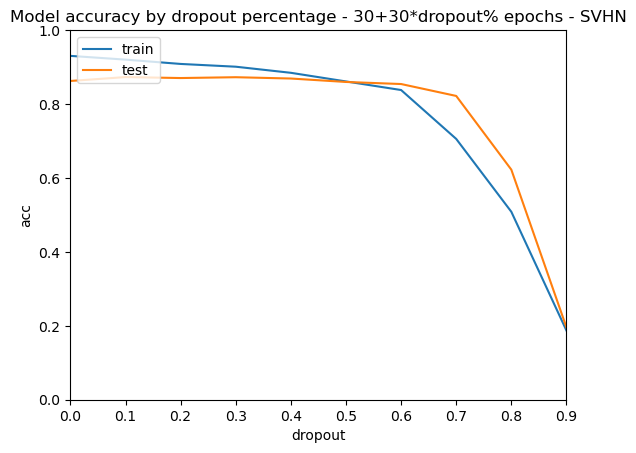

In [74]:
plt.figure(3)
plt.plot(df2['dropout'],df2['acc'])
plt.plot(df2['dropout'],df2['val_acc'])
plt.title('Model accuracy by dropout percentage - 30+30*dropout% epochs - SVHN')
plt.ylabel('acc')
plt.xlabel('dropout')
plt.legend(['train', 'test'], loc='upper left')
plt.xlim([0.0,0.9])
plt.ylim([0.0,1.0])
plt.show()

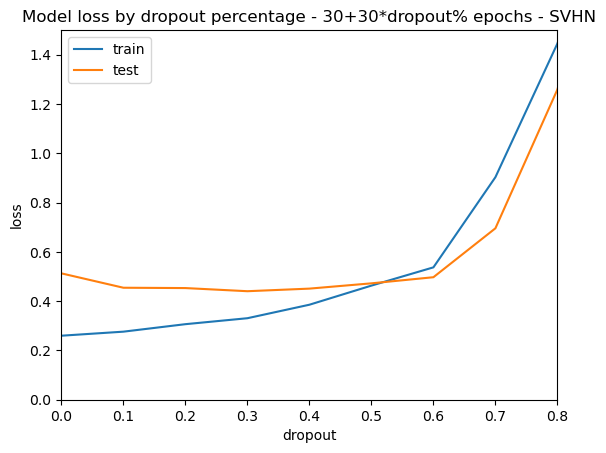

In [75]:
plt.figure(4)
plt.plot(df2['dropout'],df2['loss'])
plt.plot(df2['dropout'],df2['val_loss'])
plt.title('Model loss by dropout percentage - 30+30*dropout% epochs - SVHN')
plt.ylabel('loss')
plt.xlabel('dropout')
plt.legend(['train', 'test'], loc='upper left')
plt.xlim([0.0,0.8])
plt.ylim([0.0,1.5])
plt.show()

In [76]:
del(df2)
gc.collect()

6801

# Fashion MNIST

## Model

In [3]:
x_train = np.load('./ModelData/x_train-FASHION.npy')
y_train = np.load('./ModelData/y_train-FASHION.npy')
x_test = np.load('./ModelData/x_test-FASHION.npy')
y_test = np.load('./ModelData/y_test-FASHION.npy')

In [4]:
count = 1

for i in [0,0.2,0.4,0.6,0.8]:
    model = Sequential()
    model.add(Dense(256, activation='sigmoid', input_shape = (784,)))
    model.add(Dense(256, activation='sigmoid',))
    model.add(Dropout(i))
    model.add(Dense(256, activation='sigmoid',))
    model.add(Dropout(i))
    model.add(Dense(256, activation='sigmoid',))
    model.add(Dropout(i))
    model.add(Dense(256, activation='sigmoid',))
    model.add(Dropout(i))
    model.add(Dense(10, activation='sigmoid',))

    model.summary()
    opt = tf.keras.optimizers.Adam(learning_rate=5e-5)
    model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['acc'])

    score = model.fit(x_train[:3000], y_train[:3000], epochs=100, batch_size=20 ,validation_data=(x_test, y_test),verbose=2)
    json.dump(score.history, open("./Results/Experiment"+str(int(i*10))+"-FASHION", 'w'))

    del(model)
    del(score)
    gc.collect()
    clear_output(wait=True)
    print(count)
    count+=1
print("FINISHED")

5
FINISHED


In [5]:
del(x_train)
del(x_test)
del(y_train)
del(y_test)
gc.collect()

0

## Visualization

In [10]:
score0 = json.load(open('./Results/Experiment0-FASHION', 'r'))
score2 = json.load(open('./Results/Experiment2-FASHION', 'r'))
score4 = json.load(open('./Results/Experiment4-FASHION', 'r'))
score6 = json.load(open('./Results/Experiment6-FASHION', 'r'))
score8 = json.load(open('./Results/Experiment8-FASHION', 'r'))

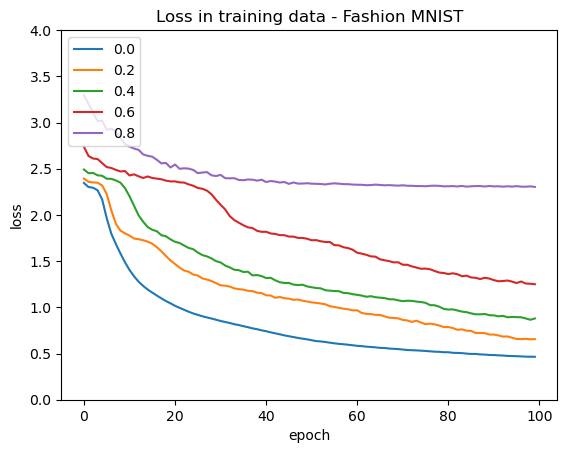

In [17]:
plt.figure(1)
plt.plot(score0['loss'])
plt.plot(score2['loss'])
plt.plot(score4['loss'])
plt.plot(score6['loss'])
plt.plot(score8['loss'])
plt.title('Loss in training data - Fashion MNIST')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['0.0','0.2','0.4','0.6','0.8'], loc='upper left')
plt.ylim([0.0,4.0])
plt.show()

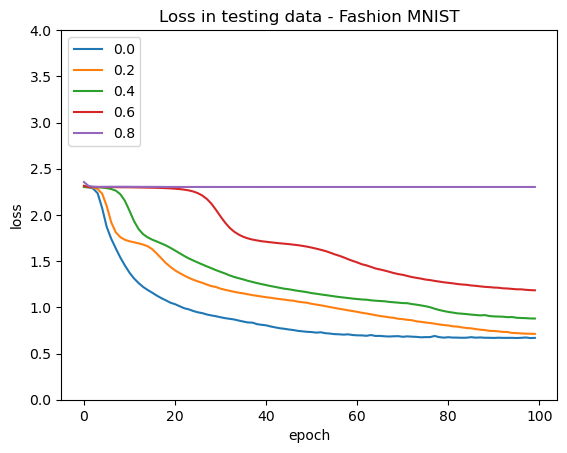

In [18]:
plt.figure(1)
plt.plot(score0['val_loss'])
plt.plot(score2['val_loss'])
plt.plot(score4['val_loss'])
plt.plot(score6['val_loss'])
plt.plot(score8['val_loss'])
plt.title('Loss in testing data - Fashion MNIST')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['0.0','0.2','0.4','0.6','0.8'], loc='upper left')
plt.ylim([0.0,4.0])
plt.show()

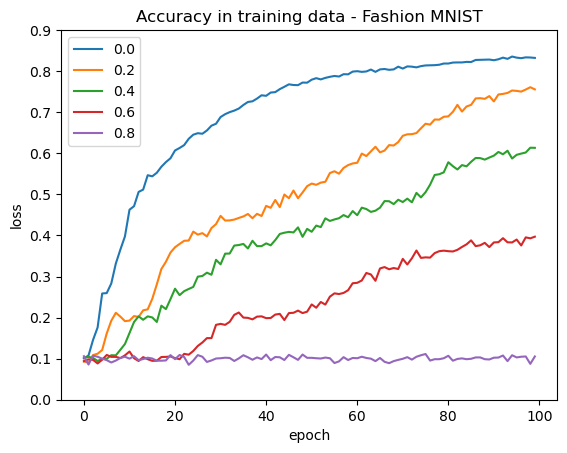

In [19]:
plt.figure(1)
plt.plot(score0['acc'])
plt.plot(score2['acc'])
plt.plot(score4['acc'])
plt.plot(score6['acc'])
plt.plot(score8['acc'])
plt.title('Accuracy in training data - Fashion MNIST')
plt.ylabel('acc')
plt.xlabel('epoch')
plt.legend(['0.0','0.2','0.4','0.6','0.8'], loc='upper left')
plt.ylim([0.0,0.9])
plt.show()

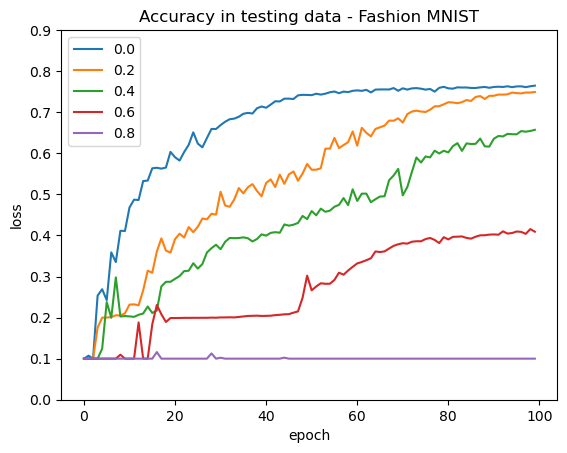

In [20]:
plt.figure(1)
plt.plot(score0['val_acc'])
plt.plot(score2['val_acc'])
plt.plot(score4['val_acc'])
plt.plot(score6['val_acc'])
plt.plot(score8['val_acc'])
plt.title('Accuracy in testing data - Fashion MNIST')
plt.ylabel('acc')
plt.xlabel('epoch')
plt.legend(['0.0','0.2','0.4','0.6','0.8'], loc='upper left')
plt.ylim([0.0,0.9])
plt.show()

In [21]:
del(score0)
del(score2)
del(score4)
del(score6)
del(score8)
gc.collect()

39164

# Boston Housing

# Model

In [6]:
x_train = np.load('./ModelData/x_train-BOSTON.npy')
y_train = np.load('./ModelData/y_train-BOSTON.npy')
x_test = np.load('./ModelData/x_test-BOSTON.npy')
y_test = np.load('./ModelData/y_test-BOSTON.npy')

In [7]:
count = 1

for i in [0,0.2,0.4,0.6,0.8]:
    model = Sequential()
    model.add(Dense(256, activation='sigmoid', input_shape = (13,)))
    model.add(Dense(256, activation='sigmoid',))
    model.add(Dropout(i))
    model.add(Dense(256, activation='sigmoid',))
    model.add(Dropout(i))
    model.add(Dense(256, activation='sigmoid',))
    model.add(Dropout(i))
    model.add(Dense(256, activation='sigmoid',))
    model.add(Dropout(i))
    model.add(Dense(10, activation='sigmoid',))

    model.summary()
    opt = tf.keras.optimizers.Adam(learning_rate=5e-5)
    model.compile(optimizer=opt, loss='mean_squared_error', metrics=['mae'])

    score = model.fit(x_train, y_train, epochs=100, batch_size=20 ,validation_data=(x_test, y_test),verbose=2)
    json.dump(score.history, open("./Results/Experiment"+str(int(i*10))+"-BOSTON", 'w'))

    del(model)
    del(score)
    gc.collect()
    clear_output(wait=True)
    print(count)
    count+=1
print("FINISHED")

5
FINISHED


In [8]:
del(x_train)
del(x_test)
del(y_train)
del(y_test)
gc.collect()

0

## Visualization

In [22]:
score0 = json.load(open('./Results/Experiment0-BOSTON', 'r'))
score2 = json.load(open('./Results/Experiment2-BOSTON', 'r'))
score4 = json.load(open('./Results/Experiment4-BOSTON', 'r'))
score6 = json.load(open('./Results/Experiment6-BOSTON', 'r'))
score8 = json.load(open('./Results/Experiment8-BOSTON', 'r'))

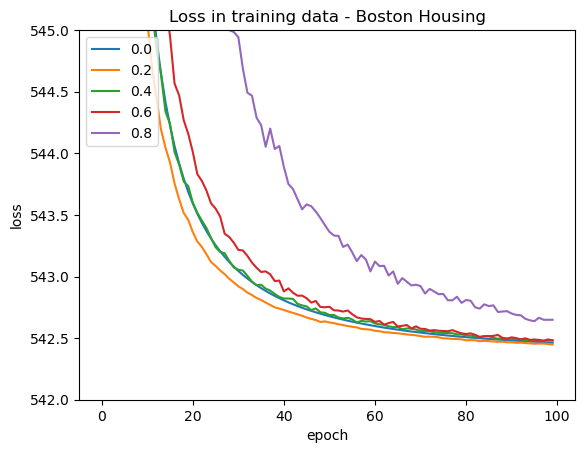

In [34]:
plt.figure(1)
plt.plot(score0['loss'])
plt.plot(score2['loss'])
plt.plot(score4['loss'])
plt.plot(score6['loss'])
plt.plot(score8['loss'])
plt.title('Loss in training data - Boston Housing')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['0.0','0.2','0.4','0.6','0.8'], loc='upper left')
plt.ylim([542.0,545.0])
plt.show()

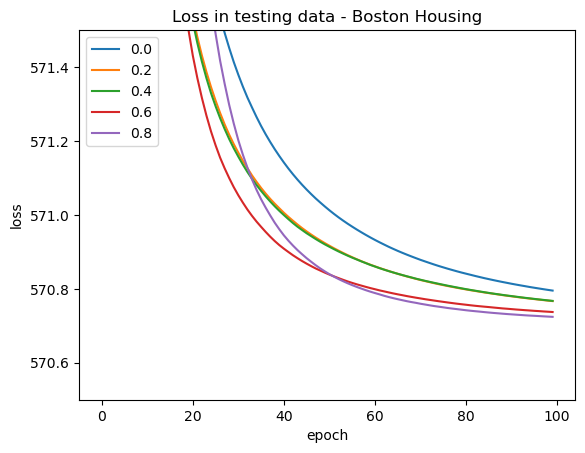

In [44]:
plt.figure(1)
plt.plot(score0['val_loss'])
plt.plot(score2['val_loss'])
plt.plot(score4['val_loss'])
plt.plot(score6['val_loss'])
plt.plot(score8['val_loss'])
plt.title('Loss in testing data - Boston Housing')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['0.0','0.2','0.4','0.6','0.8'], loc='upper left')
plt.ylim([570.5,571.5])
plt.show()

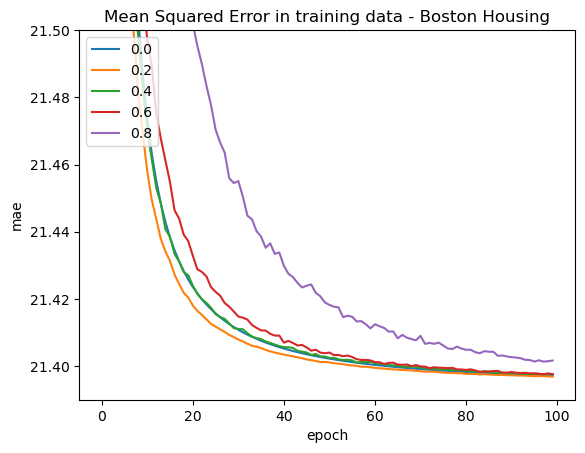

In [48]:
plt.figure(1)
plt.plot(score0['mae'])
plt.plot(score2['mae'])
plt.plot(score4['mae'])
plt.plot(score6['mae'])
plt.plot(score8['mae'])
plt.title('Mean Squared Error in training data - Boston Housing')
plt.ylabel('mae')
plt.xlabel('epoch')
plt.legend(['0.0','0.2','0.4','0.6','0.8'], loc='upper left')
plt.ylim([21.39,21.5])
plt.show()

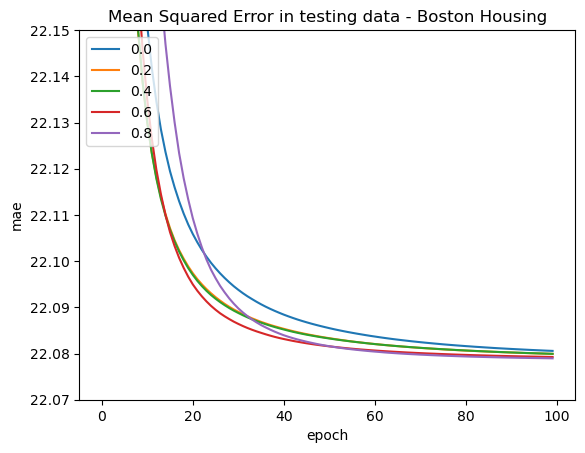

In [58]:
plt.figure(1)
plt.plot(score0['val_mae'])
plt.plot(score2['val_mae'])
plt.plot(score4['val_mae'])
plt.plot(score6['val_mae'])
plt.plot(score8['val_mae'])
plt.title('Mean Squared Error in testing data - Boston Housing')
plt.ylabel('mae')
plt.xlabel('epoch')
plt.legend(['0.0','0.2','0.4','0.6','0.8'], loc='upper left')
plt.ylim([22.07,22.15])
plt.show()

In [59]:
del(score0)
del(score2)
del(score4)
del(score6)
del(score8)
gc.collect()

3887

# Ox Flowers17

## Model

In [11]:
x = np.load('./ModelData/x-FLOWER.npy')
y = np.load('./ModelData/y-FLOWER.npy')

In [ ]:
model=Sequential()
# 1st Convolutional Layer
model.add(Conv2D(filters=96,input_shape=(224,224,3),kernel_size=(11,11),strides=(4,4)))
model.add(Activation('relu'))

#1st maxpooling
model.add(MaxPooling2D(pool_size=(3,3),strides=(2,2)))
model.add(BatchNormalization())

#2nd convolutional layer
model.add(Conv2D(filters=256,kernel_size=(5,5),padding='valid',strides=(1,1)))
model.add(Activation('relu'))

#2st maxpooling
model.add(MaxPooling2D(pool_size=(3,3),strides=(2,2)))
model.add(BatchNormalization())

#3rd convolutional layer
model.add(Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), padding='valid'))
model.add(Activation('relu'))
model.add(BatchNormalization())

# 4th Convolutional Layer
model.add(Conv2D(filters=256, kernel_size=(3,3), strides=(1,1), padding='valid'))
model.add(Activation('relu'))
model.add(BatchNormalization())

# 5th Convolutional Layer
model.add(Conv2D(filters=256, kernel_size=(3,3), strides=(1,1), padding='valid'))
model.add(Activation('relu'))

#3rd maxpooling
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))
model.add(BatchNormalization())


# Passing it to a dense layer
model.add(Flatten())
# 1st Dense Layer
model.add(Dense(4096, input_shape=(224*224*3,)))
model.add(Activation('relu'))
# Batch Normalisation
model.add(BatchNormalization())

# 2nd Dense Layer
model.add(Dense(4096))
model.add(Activation('relu'))
# Batch Normalisation
model.add(BatchNormalization())

# 3rd Dense Layer
model.add(Dense(1000))
model.add(Activation('relu'))
# Batch Normalisation
model.add(BatchNormalization())

# Output Layer
model.add(Dense(17))
model.add(Activation('softmax'))

model.summary()
# (4) Compile 
model.compile(loss='categorical_crossentropy', optimizer='adam',\
 metrics=['accuracy','mae','mse'])

# (5) Train
score = model.fit(x, y, batch_size=64, epochs=20, verbose=1, validation_split=0.2, shuffle=True)


json.dump(score.history, open("./Results/NonDropoutModel-OxFlower", 'w'))

In [ ]:
del(model)
del(score)
gc.collect()

In [ ]:
model=Sequential()
# 1st Convolutional Layer
model.add(Conv2D(filters=96,input_shape=(224,224,3),kernel_size=(11,11),strides=(4,4)))
model.add(Activation('relu'))

#1st maxpooling
model.add(MaxPooling2D(pool_size=(3,3),strides=(2,2)))
model.add(BatchNormalization())

#2nd convolutional layer
model.add(Conv2D(filters=256,kernel_size=(5,5),padding='valid',strides=(1,1)))
model.add(Activation('relu'))

#2nd maxpooling
model.add(MaxPooling2D(pool_size=(3,3),strides=(2,2)))
model.add(BatchNormalization())

#3rd convolutional layer
model.add(Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), padding='valid'))
model.add(Activation('relu'))
model.add(BatchNormalization())

# 4th Convolutional Layer
model.add(Conv2D(filters=256, kernel_size=(3,3), strides=(1,1), padding='valid'))
model.add(Activation('relu'))
model.add(BatchNormalization())

# 5th Convolutional Layer
model.add(Conv2D(filters=256, kernel_size=(3,3), strides=(1,1), padding='valid'))
model.add(Activation('relu'))

#3rd maxpooling
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))
model.add(BatchNormalization())


# Passing it to a dense layer
model.add(Flatten())
# 1st Dense Layer
model.add(Dense(4096, input_shape=(224*224*3,)))
model.add(Activation('relu'))
# Add Dropout to prevent overfitting
model.add(Dropout(0.5))
# Batch Normalisation
model.add(BatchNormalization())

# 2nd Dense Layer
model.add(Dense(4096))
model.add(Activation('relu'))
# Add Dropout
model.add(Dropout(0.5))
# Batch Normalisation
model.add(BatchNormalization())

# 3rd Dense Layer
model.add(Dense(1000))
model.add(Activation('relu'))
# Add Dropout
model.add(Dropout(0.5))
# Batch Normalisation
model.add(BatchNormalization())

# Output Layer
model.add(Dense(17))
model.add(Activation('softmax'))

model.summary()

# (4) Compile 
model.compile(loss='categorical_crossentropy', optimizer='adam',\
 metrics=['accuracy','mae','mse'])

# (5) Train
score = model.fit(x, y, batch_size=64, epochs=20, verbose=1, validation_split=0.2, shuffle=True)


json.dump(score.history, open("./Results/DropoutModel-OxFlower", 'w'))

In [13]:
del(model)
del(score)
del(x)
del(y)
gc.collect()

22

## Visualization

In [4]:
score0 = json.load(open('./Results/NonDropoutModel-FLOWER', 'r'))
score1 = json.load(open('./Results/DropoutModel-FLOWER', 'r'))

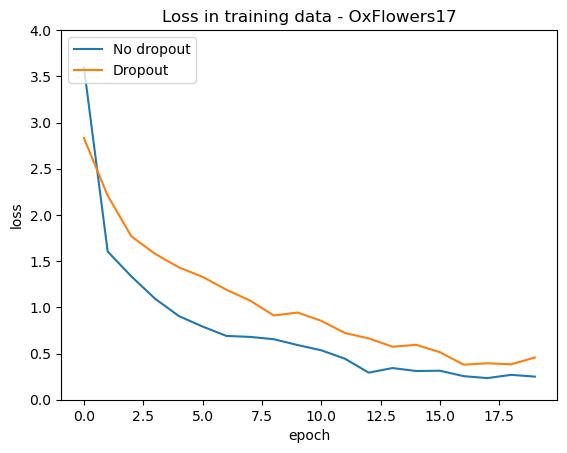

In [5]:
plt.figure(1)
plt.plot(score0['loss'])
plt.plot(score1['loss'])
plt.title('Loss in training data - OxFlowers17')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['No dropout','Dropout'], loc='upper left')
plt.ylim([0.0,4.0])
plt.show()

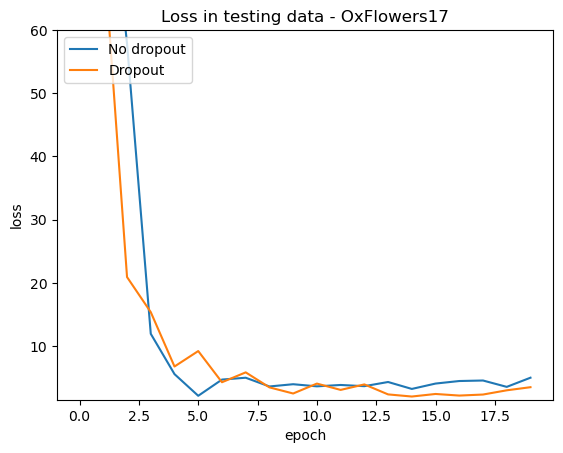

In [6]:
plt.figure(1)
plt.plot(score0['val_loss'])
plt.plot(score1['val_loss'])
plt.title('Loss in testing data - OxFlowers17')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['No dropout','Dropout'], loc='upper left')
plt.ylim([1.5,60.0])
plt.show()

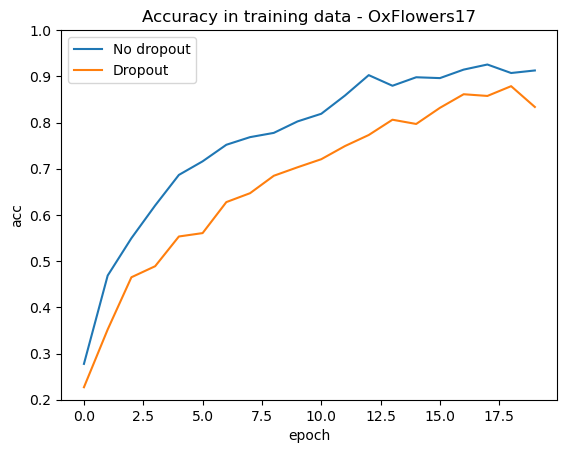

In [7]:
plt.figure(1)
plt.plot(score0['acc'])
plt.plot(score1['acc'])
plt.title('Accuracy in training data - OxFlowers17')
plt.ylabel('acc')
plt.xlabel('epoch')
plt.legend(['No dropout','Dropout'], loc='upper left')
plt.ylim([0.2,1.0])
plt.show()

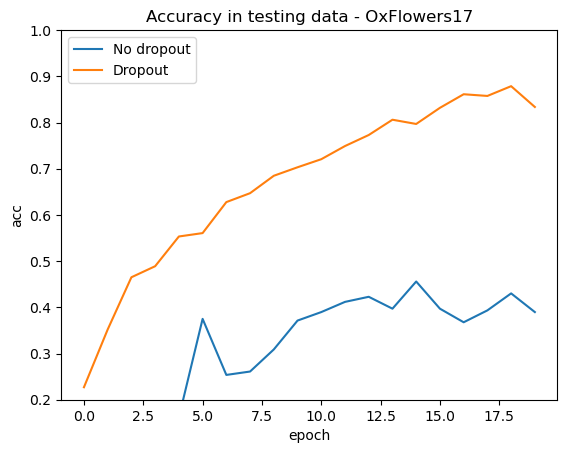

In [8]:
plt.figure(1)
plt.plot(score0['val_acc'])
plt.plot(score1['acc'])
plt.title('Accuracy in testing data - OxFlowers17')
plt.ylabel('acc')
plt.xlabel('epoch')
plt.legend(['No dropout','Dropout'], loc='upper left')
plt.ylim([0.2,1.0])
plt.show()

In [9]:
del(score0)
del(score1)
gc.collect()

13997

# Skin tumor

## Model

In [8]:
x_train = np.load('./ModelData/x_train-SKIN.npy')
y_train = np.load('./ModelData/y_train-SKIN.npy')
x_test = np.load('./ModelData/x_test-SKIN.npy')
y_test = np.load('./ModelData/y_test-SKIN.npy')

In [9]:
df = pd.DataFrame(columns=['dropout','loss', 'accuracy', 'mae', 'mse', 'val_loss', 'val_accuracy', 'val_mae', 'val_mse'],dtype='float64')

In [ ]:
count = 1
for i in [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]:

    model = Sequential()
    model.add(Dense(100, input_dim=15, kernel_initializer='normal', activation='relu',
                  ))
    model.add(Dense(100, input_dim=15, kernel_initializer='normal', activation='relu',
                  ))
    model.add(Dense(100, input_dim=15, kernel_initializer='normal', activation='relu',
                  ))
    model.add(Dropout(i, input_shape=(15,)))
    model.add(Dense(3, kernel_initializer='normal', activation='sigmoid'))
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy','mse','mae'])
    model.summary()
    score = model.fit(x_train, y_train, epochs=100, batch_size=20 ,validation_data=(x_test, y_test))
    newRow = [i]
    newRow.append(score.history['loss'][-1])
    newRow.append(score.history['accuracy'][-1])
    newRow.append(score.history['mae'][-1])
    newRow.append(score.history['mse'][-1])
    newRow.append(score.history['val_loss'][-1])
    newRow.append(score.history['val_accuracy'][-1])
    newRow.append(score.history['val_mae'][-1])
    newRow.append(score.history['val_mse'][-1])
    newDF = pd.DataFrame([newRow],columns=['dropout','loss', 'acc', 'mae', 'mse', 'val_loss', 'val_acc', 'val_mae', 'val_mse']) 
    df = pd.concat([df,newDF])

    del(model)
    del(score)
    del(newRow)
    del(newDF)
    gc.collect()

    print(count)
    count += 1
print("FINISHED")

In [ ]:
df.to_csv('./Results/skinCancer.csv', index=False)

In [10]:
del(x_train)
del(x_test)
del(y_train)
del(y_test)
del(df)
gc.collect()

44